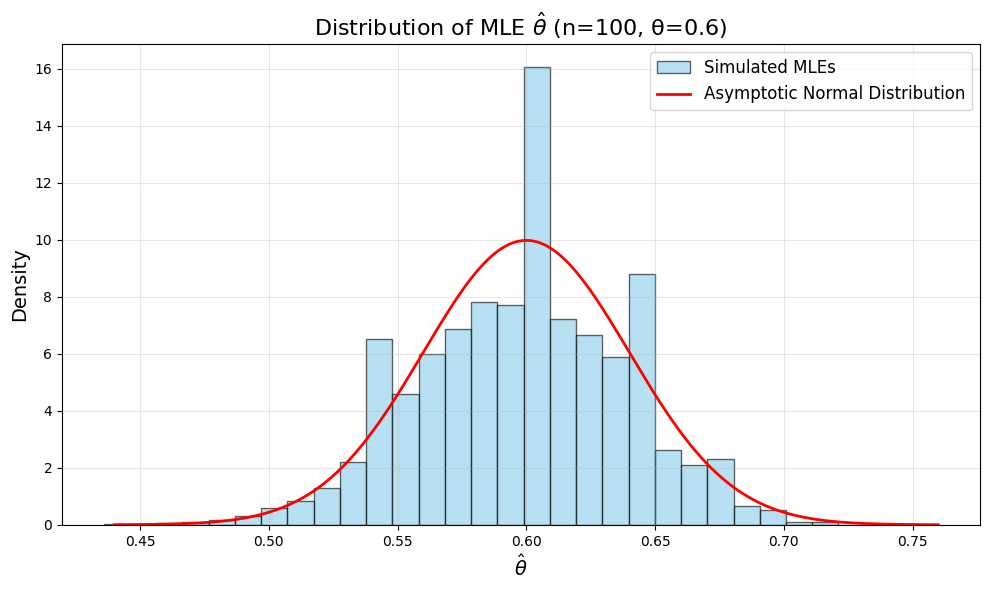

Kolmogorov-Smirnov Test:
Statistic: 0.0447, p-value: 0.0000
Reject the null hypothesis: The MLEs do not follow the normal distribution.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set random seed for reproducibility
np.random.seed(42)

# 1. Define True Parameter
true_theta = 0.6  # True value of theta in (0,1)

# 2. Set Simulation Parameters
n = 100          # Sample size for each simulation
num_simulations = 10000  # Total number of simulations

# 3. Simulate Data and Compute MLEs
# The number of negative samples 'a' follows a Binomial(n, p) where p = theta^2
p = true_theta ** 2  # Probability of a negative sample

# Simulate 'a' for all simulations at once
a_values = np.random.binomial(n, p, size=num_simulations)
b_values = n - a_values  # Number of positive samples

# Compute MLE for theta: theta_hat = sqrt(a / n)
theta_hats = np.sqrt(a_values/(a_values + b_values))

# 4. Plot Histogram of MLEs
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(theta_hats, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated MLEs')

# 5. Overlay Theoretical Normal Distribution
# Calculate theoretical mean and standard deviation
# From asymptotic theory: E[theta_hat] = theta, Var(theta_hat) = (1 - theta^2)/(4 * n * theta^2)
mu = true_theta
sigma = np.sqrt((1 - true_theta**2) / (4 * n))

# Generate points for the normal distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
normal_dist = stats.norm.pdf(x, mu, sigma)

plt.plot(x, normal_dist, 'r-', lw=2, label='Asymptotic Normal Distribution')

# 6. Customize the Plot
plt.title(f'Distribution of MLE $\hat{{\\theta}}$ (n={n}, θ={true_theta})', fontsize=16)
plt.xlabel('$\hat{\\theta}$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

# 7. Display the Plot
plt.show()

# 8. Additional: Statistical Test (Optional)
# Perform a Kolmogorov-Smirnov test to compare the MLE distribution to the normal distribution
ks_stat, p_value = stats.kstest(theta_hats, 'norm', args=(mu, sigma))
print(f"Kolmogorov-Smirnov Test:\nStatistic: {ks_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation of KS Test
if p_value > 0.05:
    print("Fail to reject the null hypothesis: The MLEs follow the normal distribution.")
else:
    print("Reject the null hypothesis: The MLEs do not follow the normal distribution.")


In [5]:
import sympy as sp

# Step 1: Define the symbolic variable
theta = sp.symbols('theta')

# Step 2: Define the expression f(theta) = -2*theta / (1 - theta**2)
f_theta = -2 * theta / (1 - theta**2)

# Display the original function
print("Original function f(theta):")
sp.pprint(f_theta)
print("\n")

# Step 3: Differentiate f(theta) with respect to theta
f_prime = sp.diff(f_theta, theta)

# Display the derivative
print("Derivative of f(theta) with respect to theta:")
sp.pprint(f_prime)
print(f_prime)
print("\n")

# Step 4: Simplify the derivative (optional)
f_prime_simplified = sp.simplify(f_prime)

# Display the simplified derivative
print("Simplified derivative of f(theta):")
sp.pprint(f_prime_simplified)


Original function f(theta):
-2⋅θ  
──────
     2
1 - θ 


Derivative of f(theta) with respect to theta:
       2            
    4⋅θ         2   
- ───────── - ──────
          2        2
  ⎛     2⎞    1 - θ 
  ⎝1 - θ ⎠          
-4*theta**2/(1 - theta**2)**2 - 2/(1 - theta**2)


Simplified derivative of f(theta):
  ⎛   2    ⎞ 
2⋅⎝- θ  - 1⎠ 
─────────────
 4      2    
θ  - 2⋅θ  + 1


In [11]:
import scipy.stats as stats

# Define the degree of freedom
df = 1

# Compute the 0.95 quantile of the Chi-squared distribution
quantile_095 = stats.chi2.ppf(0.95, df)

# Print the result
print(f"The 0.95 quantile of the Chi-squared distribution with {df} degree of freedom is: {quantile_095}")


The 0.95 quantile of the Chi-squared distribution with 1 degree of freedom is: 3.841458820694124


In [14]:
import numpy as np
import scipy.stats as stats

def wald_test_statistic(n, a, b):
    """
    Performs the Wald test for the null hypothesis H0: theta = sqrt(0.5).

    Parameters:
    n (int): Total number of observations.
    a (int): Number of observations where x ∈ (-1, 0).
    b (int): Number of observations where x ∈ [0, 1].

    Returns:
    dict: A dictionary containing the test statistic, critical value, p-value, and conclusion.
    """
    # Step 1: Compute the MLE estimate of theta
    hat_theta = np.sqrt(a / n)

    # Null hypothesis value of theta
    theta_0 = np.sqrt(0.5)

    # Step 2: Compute the variance V under H0: theta = theta_0
    V = (1 - theta_0**2) / 4

    # Step 3: Compute the test statistic T^2
    T_squared = (np.sqrt(n) * (hat_theta - theta_0) / np.sqrt(V))**2

    # Step 4: Critical value from chi-squared distribution with 1 degree of freedom at 5% significance level
    alpha = 0.05
    df = 1
    critical_value = stats.chi2.ppf(1 - alpha, df)

    # Step 5: Compute the p-value
    p_value = 1 - stats.chi2.cdf(T_squared, df)

    # Step 6: Conclusion
    if T_squared > critical_value:
        conclusion = "Reject the null hypothesis H0: theta = sqrt(0.5)."
    else:
        conclusion = "Fail to reject the null hypothesis H0: theta = sqrt(0.5)."

    # Return the results
    return {
        'hat_theta': hat_theta,
        'T_squared': T_squared,
        'critical_value': critical_value,
        'p_value': p_value,
        'conclusion': conclusion
    }

wald_test_statistic(n, a=40, b=60)

{'hat_theta': 0.6324555320336759,
 'T_squared': 4.458247200067301,
 'critical_value': 3.841458820694124,
 'p_value': 0.03473312058802469,
 'conclusion': 'Reject the null hypothesis H0: theta = sqrt(0.5).'}